# Modulo 4: Ejercicios 2
## Alumno: Jose Suarez

## Ejercicio 1
Una compañía desea hacer predicciones del valor anual de sus ventas totales en cierto país a partir de la relación de éstas y la renta nacional. Para investigar la relación cuenta con los siguientes datos:

    X: representa la renta nacional en millones de euros
    Y: representa las ventas de la compañía en miles de euros 
    
en el periodo que va desde 2010 hasta 2020 (ambos inclusive).

In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline
sns.set_theme(style="darkgrid", palette=['#ffffff','#582572','#582572'],
              context="notebook",font_scale=1.5, rc={'figure.facecolor':'#6F2F91',
                                                     'axes.facecolor':'#A847DB',
                                                     'axes.labelcolor': '#ffffff',
                                                     'xtick.color': '#ffffff',
                                                     'ytick.color': '#ffffff'
                                                     })

x = [189,190,208,227,239,252,257,274,293,308,316]
y = [402,404,412,425,429,436,440,447,458,469,469]

rentaxVentasDF = pd.DataFrame({"X": x, "Y": y})

print(rentaxVentasDF)

      X    Y
0   189  402
1   190  404
2   208  412
3   227  425
4   239  429
5   252  436
6   257  440
7   274  447
8   293  458
9   308  469
10  316  469


### 1.a) La recta de regresión lineal de Y sobre X.

1.a) Aplicando la regresion lineal desde la libreria sklearn
se tendria la recta de regresion lineal expresada en el siguiente grafico: 


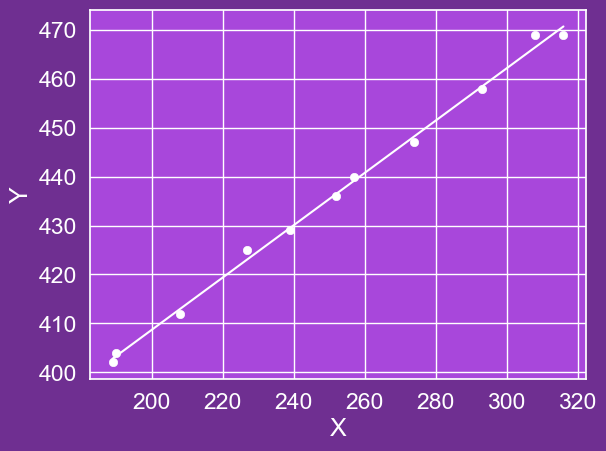

In [128]:
print("1.a) Aplicando la regresion lineal desde la libreria sklearn\nse tendria la recta de regresion lineal expresada en el siguiente grafico: ")
Xserie = rentaxVentasDF["X"]
Yserie = rentaxVentasDF["Y"]
modelo_LR = LinearRegression()

modelo_LR.fit(y=Yserie.values.reshape(-1,1), X=Xserie.values.reshape(-1,1))
prediccion_Y = modelo_LR.predict(Xserie.values.reshape(-1,1))

sns.scatterplot(y=rentaxVentasDF["Y"],x=rentaxVentasDF["X"]) 
sns.lineplot(y = prediccion_Y.reshape(1,-1)[0], x = rentaxVentasDF["X"])
plt.show()

### 1.b) El coeficiente de correlación lineal e interpretarlo.

In [131]:
coeficienteCorrLineal = modelo_LR.score(y=Yserie.values.reshape(-1,1), X=Xserie.values.reshape(-1,1))

print(f"1.b) El coeficiente de correlacion lineal es {np.round(coeficienteCorrLineal,4)}")
print("Esto nos indica una alta correlacion lineal entre ambas variables, por lo que las ventas de la compañia se correlaciona de manera proporcinal positiva de manera lineal a la renta nacional")
print("A mayor renta nacional, mayor ventas de la compañia")

1.b) El coeficiente de correlacion lineal es 0.9969
Esto nos indica una alta correlacion lineal entre ambas variables, por lo que las ventas de la compañia se correlaciona de manera proporcinal positiva de manera lineal a la renta nacional
A mayor renta nacional, mayor ventas de la compañia


### c) Si en 2011 la renta nacional del país fue de 325 millones de euros. ¿Cuál será la predicción para las ventas de la compañía en este año?

In [145]:
prediccionRenta325 = np.round(modelo_LR.predict([[325]])[0][0], 2)
print(f"Si la renta nacional es de 325 millones de euros para el 2011\nSe tendria una prediccion de ventas de {prediccionRenta325} miles de euros")

Si la renta nacional es de 325 millones de euros para el 2011
Se tendria una prediccion de ventas de 475.52 miles de euros


### Ejercicio 2:
Sabiendo que el coeficiente de relación de Pearson se calcula también como:

### 2.a) Entonces, En una empresa de transporte trabajan 4 conductores. Los años de antigüedad de sus permisos de conducir y el número de infracciones cometidas en el último año por cada uno de ellos son los siguientes:

2.a) Segun el grafico se aprecia una correlacion lineal negativa entre los años de antiguedad y las infracciones.
El coeficiente de pearson entre años de antiguedad e infracciones es -1.0
Esto indica que ambos presentan una relacion lineal negativa perfecta, lo que confirma que a mayor años de antiguedad conduciendo, menor es la cantidad de infracciones que cometen.


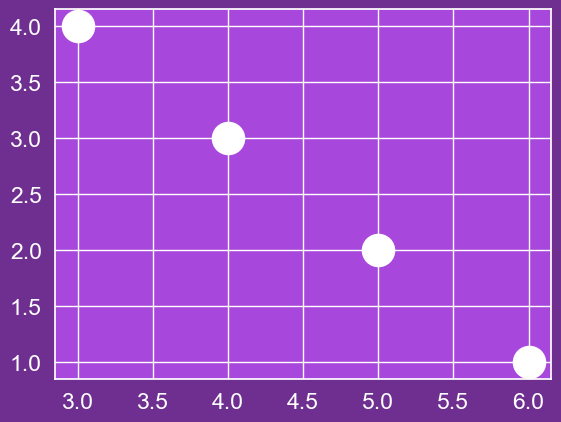

In [176]:
X = np.arange(3,7)
Y = np.flip(np.arange(1,5))

infraccionesAños = pd.DataFrame({"infracciones":Y,"Antiguedad":X})

sns.scatterplot(y=Y,x=X, s = 500) 
pearsonInfAños = infraccionesAños["infracciones"].corr(infraccionesAños["Antiguedad"])

print("2.a) Segun el grafico se aprecia una correlacion lineal negativa entre los años de antiguedad y las infracciones.")

print(f"El coeficiente de pearson entre años de antiguedad e infracciones es {pearsonInfAños}")
print("Esto indica que ambos presentan una relacion lineal negativa perfecta, lo que confirma que a mayor años de antiguedad conduciendo, menor es la cantidad de infracciones que cometen.")
plt.show()


### 2.b) En un Centro de Salud hacen el seguimiento de la presión arterial a sus pacientes, y los resultados constatan que aquéllos que tienen una tensión arterial tienen sobrepeso, superior a la media.
Calcular la covarianza y el coeficiente de correlación de Pearson de este estudio.

In [199]:
pesoLista = [72,76,78,81,89,95,108,115,120,130]
presionLista = [115,121,125,130,141,150,165,170,177,178]

datosSaludDF = pd.DataFrame({"peso":pesoLista,"presion":presionLista})

covarianzaPesoPresion = np.round(datosSaludDF.cov().iloc[0,1],2)
pearsonDatosSalud = np.round(datosSaludDF["peso"].corr(datosSaludDF["presion"]),3)

print(f"2.b)Para el estudio se tiene que la covarianza es de {covarianzaPesoPresion} y el coeficiente de pearson es {pearsonDatosSalud}")
print("Lo que indica que el peso y la presion tiene una relacion lineal positiva, a mayor peso mayor presion arterial.")
print("Quedando en evidencia los riesgos cardiacos en la gente con obesidad")


2.b)Para el estudio se tiene que la covarianza es de 489.36 y el coeficiente de pearson es 0.986
Lo que indica que el peso y la presion tiene una relacion lineal positiva, a mayor peso mayor presion arterial.
Quedando en evidencia los riesgos cardiacos en la gente con obesidad
